# Installations and Imports

In [ ]:
pip install monai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.4 MB/s eta 0:00:00


In [ ]:
import os
from glob import glob

import torch
from monai.transforms import (
    Compose,
    LoadImaged,
    ToTensord,
    AddChanneld,
    Spacingd,
    ScaleIntensityRanged,
    CropForegroundd,
    Resized,

)

from monai.data import Dataset, DataLoader
from monai.utils import first
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing

In [ ]:
data_dir = '/content/drive/MyDrive/dataset'

In [ ]:
train_images = sorted(glob(os.path.join(data_dir, 'train_image', '*.nii.gz')))
train_labels = sorted(glob(os.path.join(data_dir, 'train_label', '*.nii.gz')))

val_images = sorted(glob(os.path.join(data_dir, 'test_image', '*.nii.gz')))
val_labels = sorted(glob(os.path.join(data_dir, 'test_label', '*.nii.gz')))


In [ ]:
train_images

['/content/drive/MyDrive/dataset/train_image/liver_0_0.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_10_4.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_10_5.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_10_6.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_11_4.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_11_5.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_11_6.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_12_4.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_12_5.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_12_6.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_13_4.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_13_5.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_13_6.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_14_4.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_14_5.nii.gz',
 '/content/drive/MyDrive/d

In [ ]:
train_files = [{'image': image_name, 'label': label_name}
               for image_name, label_name in zip(train_images, train_labels)]

val_files = [{'image': image_name, 'label': label_name}
               for image_name, label_name in zip(val_images, val_labels)]

In [ ]:
train_files

[{'image': '/content/drive/MyDrive/dataset/train_image/liver_0_0.nii.gz',
  'label': '/content/drive/MyDrive/dataset/train_label/liver_0_0.nii.gz'},
 {'image': '/content/drive/MyDrive/dataset/train_image/liver_10_4.nii.gz',
  'label': '/content/drive/MyDrive/dataset/train_label/liver_10_4.nii.gz'},
 {'image': '/content/drive/MyDrive/dataset/train_image/liver_10_5.nii.gz',
  'label': '/content/drive/MyDrive/dataset/train_label/liver_10_5.nii.gz'},
 {'image': '/content/drive/MyDrive/dataset/train_image/liver_10_6.nii.gz',
  'label': '/content/drive/MyDrive/dataset/train_label/liver_10_6.nii.gz'},
 {'image': '/content/drive/MyDrive/dataset/train_image/liver_11_4.nii.gz',
  'label': '/content/drive/MyDrive/dataset/train_label/liver_11_4.nii.gz'},
 {'image': '/content/drive/MyDrive/dataset/train_image/liver_11_5.nii.gz',
  'label': '/content/drive/MyDrive/dataset/train_label/liver_11_5.nii.gz'},
 {'image': '/content/drive/MyDrive/dataset/train_image/liver_11_6.nii.gz',
  'label': '/content/

In [ ]:
val_files

[{'image': '/content/drive/MyDrive/dataset/test_image/liver_40_0.nii.gz',
  'label': '/content/drive/MyDrive/dataset/test_label/liver_40_0.nii.gz'}]

In [ ]:
# transforms
orig_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        ToTensord(keys=['image', 'label'])
    ]
)


train_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        Spacingd(keys=['image', 'label'], pixdim=(1.5, 1.5, 2)),
        ScaleIntensityRanged(keys='image', a_min=-200, a_max=200, b_min=0.0, b_max=1.0, clip=True),
        CropForegroundd(keys=['image', 'label'], source_key='image'),
        Resized(keys=['image', 'label'], spatial_size=[128,128,64]),
        ToTensord(keys=['image', 'label'])
    ]
)


val_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        Spacingd(keys=['image', 'label'], pixdim=(1.5, 1.5, 2)),
        ScaleIntensityRanged(keys='image', a_min=-200, a_max=200, b_min=0.0, b_max=1.0, clip=True),
        CropForegroundd(keys=['image', 'label'], source_key='image'),
        Resized(keys=['image', 'label'], spatial_size=[128,128,64]),
        ToTensord(keys=['image', 'label'])
    ]
)

/usr/local/lib/python3.10/dist-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.io.dictionary LoadImaged.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.
  warn_deprecated(argname, msg, warning_category)
/usr/local/lib/python3.10/dist-packages/monai/utils/deprecate_utils.py:111: FutureWarning: <class 'monai.transforms.utility.dictionary.AddChanneld'>: Class `AddChanneld` has been deprecated since version 0.8. It will be removed in version 1.3. please use MetaTensor data type and monai.transforms.EnsureChannelFirstd instead with `channel_dim='no_channel'`.
  warn_deprecated(obj, msg, warning_category)
/usr/local/lib/python3.10/dist-packages/monai/utils/deprecate_utils.py:221: FutureWarning: monai.transforms.utility.dictionary EnsureChannelFirstd.__init__:meta_keys: Argument `meta_keys` has been deprecated since version 0.9. not needed if ima

Transforms:
- LoadImaged(keys=['image', 'label']): This transformation loads images and labels from the dataset using the specified keys.

- AddChanneld(keys=['image', 'label']): This transformation adds a channel dimension to the loaded images and labels. In medical imaging, this often means converting 2D images to 3D by adding a single channel.

- Spacingd(keys=['image', 'label'], pixdim=(1.5, 1.5, 2)): This transformation adjusts the spacing or resolution of the images and labels. It resamples the data to have a voxel size of (1.5mm, 1.5mm, 2mm) in the three dimensions.

>  Voxel size defines the physical dimensions of the individual volume elements in the 3D image. It indicates that each voxel represents a cubic volume with sides measuring 1.5 mm x 1.5 mm x 2 mm in the real world. Voxel sizes like these are commonly used in medical imaging, such as CT scans or MRI, where it's important to accurately represent the spatial dimensions of anatomical structures.

- ScaleIntensityRanged(keys='image', a_min=-200, a_max=200, b_min=0.0, b_max=1.0, clip=True): This transformation scales the intensity values of the image within a specified range. In this case, it scales values in the range [-200, 200] to the range [0.0, 1.0], effectively normalizing the image intensities.

- CropForegroundd(keys=['image', 'label'], source_key='image'): This transformation crops the foreground region of the image based on the 'image' key. It removes excess background to focus on the relevant part of the image.

- Resized(keys=['image', 'label'], spatial_size=[128, 128, 64]): This transformation resizes both the image and label to a fixed spatial size of [128, 128, 64] voxels.

> Spatial size of [128, 128, 64] means that you are specifying a target size for a 3D image or volume with 128 pixels or voxels in width, 128 pixels or voxels in height, and 64 slices in depth. When you resize an image or volume to this spatial size, the content will be adjusted to fit these dimensions.

- ToTensord(keys=['image', 'label']): This transformation converts the image and label data to PyTorch tensors. This is often necessary to prepare the data for input into a neural network.

In [ ]:
orig_ds = Dataset(data=train_files, transform=orig_transforms)
orig_loader = DataLoader(orig_ds, batch_size=1)

train_ds = Dataset(data=train_files, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=1)

val_ds = Dataset(data=val_files, transform=val_transforms)
val_loader = DataLoader(val_ds, batch_size=1)

# Plotting an example after Preprocessing

In [ ]:
train_patient = first(train_loader)

In [ ]:
train_patient

{'image': metatensor([[[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
 
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
 
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
 
           ...,
 
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ...

In [ ]:
orig_patient = first(orig_loader)
orig_patient

{'image': metatensor([[[[[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            ...,
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]],
 
           [[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            ...,
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]],
 
           [[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -102

In [ ]:
test_patient = first(val_loader)
test_patient

{'image': metatensor([[[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
 
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
 
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
 
           ...,
 
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ...

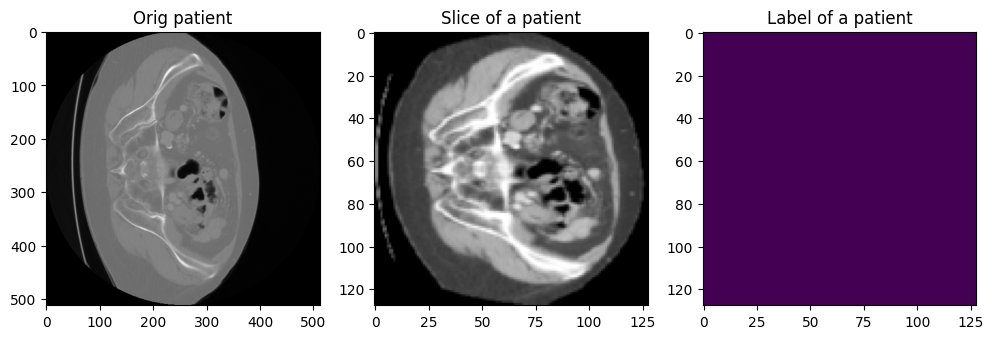

In [ ]:
plt.figure('train', (12, 6))

plt.subplot(1, 3, 1)
plt.title('Orig patient')
plt.imshow(orig_patient['image'][0, 0, : ,: ,30], cmap= "gray")

plt.subplot(1, 3, 2)
plt.title('Slice of a patient')
plt.imshow(train_patient['image'][0, 0, : ,: ,30], cmap= "gray")

plt.subplot(1,3,3)
plt.title('Label of a patient')
plt.imshow(train_patient['label'][0, 0, : ,: ,30])
plt.show()

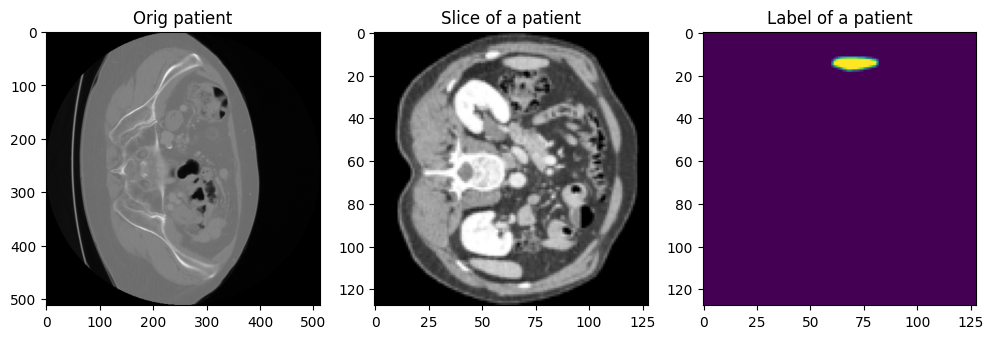

In [ ]:
plt.figure('test', (12, 6))

plt.subplot(1, 3, 1)
plt.title('Orig patient')
plt.imshow(orig_patient['image'][0, 0, : ,: ,30], cmap= "gray")

plt.subplot(1, 3, 2)
plt.title('Slice of a patient')
plt.imshow(test_patient['image'][0, 0, : ,: ,30], cmap= "gray")

plt.subplot(1,3,3)
plt.title('Label of a patient')
plt.imshow(test_patient['label'][0, 0, : ,: ,30])
plt.show()

Note:
The dimensions of the data represent batch size, channels, image height, image width, and image depth (slice number) in a 5D medical image volume.

**The second dimension represents the channels:** In some medical imaging data, we may have multiple channels of information. For example, in MRI data, we might have separate channels for different types of imaging (e.g., T1-weighted, T2-weighted). In this data, the second dimension also seems to have only one element, indicating a single channel.

# Dice Loss

## Dice coefficient
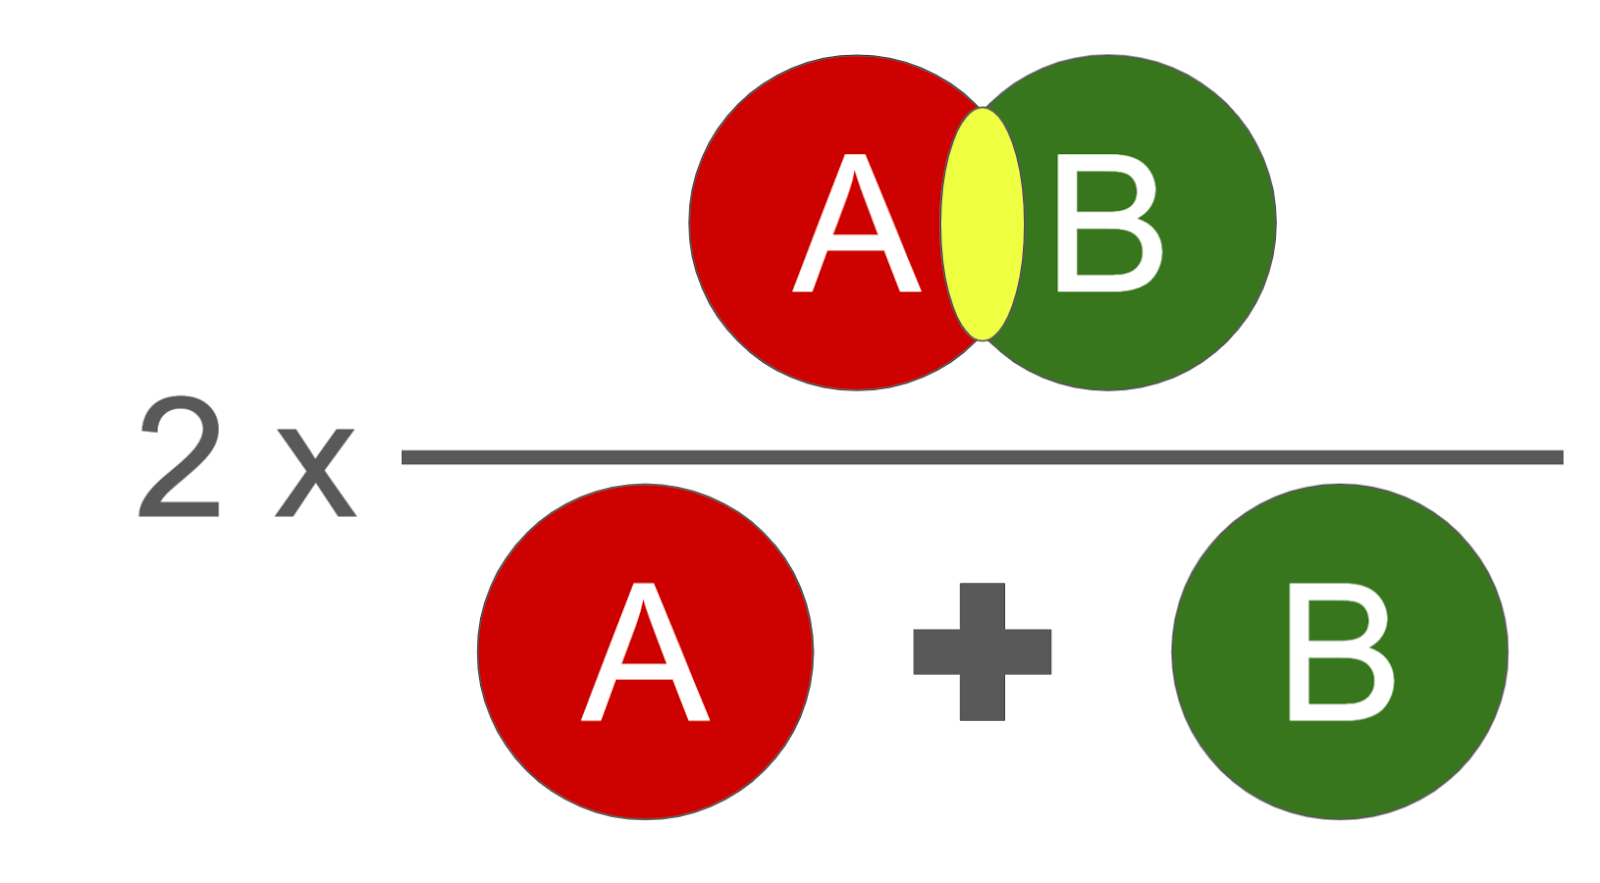

Dice coefficient -- Value between 0 and 1, nearer to 1 means that the model is predicting good results.

Thus,
Dice loss = 1 - dice coefficient

i.e better the prediction (Dice Coefficient), minimum the loss (Dice Loss).

In [ ]:
 from monai.losses import DiceLoss

 def dice_metric(predicted, target):
    '''
    In this function we take `predicted` and `target` (label) to calculate the dice coeficient then we use it
    to calculate a metric value for the training and the validation.
    '''
    dice_value = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
    value = 1 - dice_value(predicted, target).item()
    return value

# Model

In [ ]:
from monai.networks.nets import UNet
from monai.networks.layers import Norm

import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(
    spatial_dims=3, # Indicates a 3D U-Net model
    in_channels=1,  # Indicates a 3D U-Net model
    out_channels=2, # Number of output channels (e.g., for segmentation tasks)
    channels=(16, 32, 64, 128, 256),  # Number of channels at each U-Net layer
    strides=(2, 2, 2, 2), # Spatial down-sampling strides
    num_res_units=2, # Number of residual units
    norm=Norm.BATCH).to(device) # Type of normalization (e.g., batch normalization)

print(model)

UNet(
  (model): Sequential(
    (0): ResidualUnit(
      (conv): Sequential(
        (unit0): Convolution(
          (conv): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit1): Convolution(
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
      )
      (residual): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
    )
    (1): SkipConnection(
      (submodule): Sequential(
        (0): ResidualUnit(
          (conv): Sequential(


In [ ]:
from torchsummary import summary
summary(model, (1, 64, 128, 128)) # (input_channel, depth, height, width)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 32, 64, 64]             448
            Conv3d-2       [-1, 16, 32, 64, 64]             448
       BatchNorm3d-3       [-1, 16, 32, 64, 64]              32
           Dropout-4       [-1, 16, 32, 64, 64]               0
             PReLU-5       [-1, 16, 32, 64, 64]               1
            Conv3d-6       [-1, 16, 32, 64, 64]           6,928
       BatchNorm3d-7       [-1, 16, 32, 64, 64]              32
           Dropout-8       [-1, 16, 32, 64, 64]               0
             PReLU-9       [-1, 16, 32, 64, 64]               1
     ResidualUnit-10       [-1, 16, 32, 64, 64]               0
           Conv3d-11       [-1, 32, 16, 32, 32]          13,856
           Conv3d-12       [-1, 32, 16, 32, 32]          13,856
      BatchNorm3d-13       [-1, 32, 16, 32, 32]              64
          Dropout-14       [-1, 32, 16,

# Training

In [ ]:
loss_function = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
optimizer = torch.optim.Adam(model.parameters(), 1e-5, weight_decay=1e-5, amsgrad=True)

In [ ]:
def train(model, loss, optim, max_epochs, model_dir, test_interval=1 , device=device):
    best_metric = -1
    best_metric_epoch = -1
    save_loss_train = []
    save_loss_test = []
    save_metric_train = []
    save_metric_test = []

    for epoch in range(max_epochs):
        print("-" * 10)
        print(f"epoch {epoch + 1}/{max_epochs}")
        model.train()
        train_epoch_loss = 0
        train_step = 0
        epoch_metric_train = 0
        for batch_data in train_loader:

            train_step += 1

            volume = batch_data["image"]
            label = batch_data["label"]
            label = label != 0
            volume, label = (volume.to(device), label.to(device))

            optim.zero_grad()
            outputs = model(volume)

            train_loss = loss(outputs, label)

            train_loss.backward()
            optim.step()

            train_epoch_loss += train_loss.item()

            train_metric = dice_metric(outputs, label)
            epoch_metric_train += train_metric

        print(f"Train_loss: {train_loss.item():.4f}") # Training Loss
        print(f'Train_dice: {train_metric:.4f}') # Training dice coefficeint

        train_epoch_loss /= train_step
        print(f'Epoch_loss: {train_epoch_loss:.4f}') # Average Loss in the given epoch
        save_loss_train.append(train_epoch_loss)
        np.save(os.path.join(model_dir, 'loss_train.npy'), save_loss_train)

        epoch_metric_train /= train_step
        print(f'Epoch_metric: {epoch_metric_train:.4f}') # Average dice coefficent in the given epoch
        save_metric_train.append(epoch_metric_train)
        np.save(os.path.join(model_dir, 'metric_train.npy'), save_metric_train)

        print()

        if (epoch + 1) % test_interval == 0:

            model.eval()
            with torch.no_grad():
                test_epoch_loss = 0
                test_metric = 0
                epoch_metric_test = 0
                test_step = 0

                for test_data in val_loader:

                    test_step += 1

                    test_volume = test_data["image"]
                    test_label = test_data["label"]
                    test_label = test_label != 0
                    test_volume, test_label = (test_volume.to(device), test_label.to(device),)

                    test_outputs = model(test_volume)

                    test_loss = loss(test_outputs, test_label)
                    test_epoch_loss += test_loss.item()
                    test_metric = dice_metric(test_outputs, test_label)
                    epoch_metric_test += test_metric


                test_epoch_loss /= test_step
                print(f'Test_Epoch_loss: {test_epoch_loss:.4f}') # Average Test loss in given epoch
                save_loss_test.append(test_epoch_loss)
                np.save(os.path.join(model_dir, 'loss_test.npy'), save_loss_test)

                epoch_metric_test /= test_step
                print(f'Test_Epoch_metric: {epoch_metric_test:.4f}') # Average Test dice coefficient in given epoch
                save_metric_test.append(epoch_metric_test)
                np.save(os.path.join(model_dir, 'metric_test.npy'), save_metric_test)

                if epoch_metric_test > best_metric:
                    best_metric = epoch_metric_test
                    best_metric_epoch = epoch + 1
                    torch.save(model.state_dict(), os.path.join(
                        model_dir, "best_metric_model.pth"))

                print(
                    f"current epoch: {epoch + 1} --> current mean dice (Testing): {test_metric:.4f}" # By testing
                    f"\nBest mean dice: {best_metric:.4f} "
                    f"at epoch: {best_metric_epoch}"
                )

    print(
        f"train completed, best_metric: {best_metric:.4f} "
        f"at epoch: {best_metric_epoch}")

In [ ]:
model_dir = '/content/drive/MyDrive/Liver_seg_result'
train(model, loss_function, optimizer, 75, model_dir)

----------
epoch 1/100
Train_loss: 0.4082
Train_dice: 0.5918
Epoch_loss: 0.4678
Epoch_metric: 0.5322

Test_Epoch_loss: 0.5027
Test_Epoch_metric: 0.4973
current epoch: 1 --> current mean dice (Testing): 0.4973
Best mean dice: 0.4973 at epoch: 1
----------
epoch 2/100
Train_loss: 0.3859
Train_dice: 0.6141
Epoch_loss: 0.4484
Epoch_metric: 0.5516

Test_Epoch_loss: 0.4929
Test_Epoch_metric: 0.5071
current epoch: 2 --> current mean dice (Testing): 0.5071
Best mean dice: 0.5071 at epoch: 2
----------
epoch 3/100
Train_loss: 0.3695
Train_dice: 0.6305
Epoch_loss: 0.4351
Epoch_metric: 0.5649

Test_Epoch_loss: 0.4823
Test_Epoch_metric: 0.5177
current epoch: 3 --> current mean dice (Testing): 0.5177
Best mean dice: 0.5177 at epoch: 3
----------
epoch 4/100
Train_loss: 0.3520
Train_dice: 0.6480
Epoch_loss: 0.4233
Epoch_metric: 0.5767

Test_Epoch_loss: 0.4715
Test_Epoch_metric: 0.5285
current epoch: 4 --> current mean dice (Testing): 0.5285
Best mean dice: 0.5285 at epoch: 4
----------
epoch 5/100
T

**Reference on Result:**
- Train_loss --> Dice loss for last iteration of the epoch
- Train_dice --> Dice coefficient for last iteration of the epoch

> Lower the Train_loss, higher the Train_dice; better the training predictibility is assumed.

- Epoch_loss --> Average dice loss for given epoch.
- Epoch_metric --> Average dice coefficient for given epoch.

> Lower loss means higher dice coefficient. Closer the dice coefficient is to 1, better the prediction the model can perform.

- Test_Epoch_loss --> For validation data, the average dice loss.
- Test_Epoch_metric --> Average dice coefficient for validation data.

> Test metrics help verify the complexity of the model and check for overfitting and underfitting of the model.

- Best mean dice --> Best dice coefficient value on validation dataset until the given epoch.  



